## Calgary Crime Data Analysis and Neural Network Prediction

The objective of this project is to analyze Crime and Disorder Data obtained from the City of Calgary’s open data portal and to predict future crime occurrences. The dataset spans from 2018 to 2024 and contains monthly crime counts across Calgary. Exploratory data analysis is performed to identify trends, patterns, and seasonal variations in crime activity.

Following the analysis, a neural network model is developed and optimized to forecast the number of crimes expected in future periods. This approach demonstrates the application of machine learning techniques to time-series data and highlights their potential in supporting data-driven decision-making for public safety planning.

### Data Dictionary

| Column Name     | Description                                    |
|-----------------|------------------------------------------------|
| Community Name | The name of the community in Calgary           |
| Category       | The type of crime reported                     |
| Crime Count    | The number of crimes recorded in a given month |
| Year           | The year the crime occurred                   |
| Month          | The month the crime occurred                  |


### Strategy
1. Loading the data and understanding the data
2. Data Preprocessing - cleaing the data and preparing it for analysis
3. Exploratory Data Analysis - Analyzing the data to understand the trends and patterns
4. Building a Neural Network Model
5. Optimizing the model
6. Training the model
7. Predicting the number of crimes that will occur in the future

In [16]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
#loading the dataset
df = pd.read_csv('/content/Community_Crime_Statistics_20240522.csv')
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


The first five records of the dataset provide a brief overview of the data. Since the dataset is sorted alphabetically by Community Name, the records are not in chronological order.

### Data Preprocessing

In [18]:
# shape of the dataset
df.shape

(70661, 5)

Enough data for analysis and building a model for prediction.

In [19]:
# checking for missing values
df.isnull().sum()

,0
Community,0
Category,0
Crime Count,0
Year,0
Month,0


The dataset is pretty clean and does not have any missing values.

In [20]:
# checking for the datatypes
df.dtypes

,0
Community,object
Category,object
Crime Count,int64
Year,int64
Month,int64


In [21]:
# Descriptive statistics
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


## Exploratory Data Analysis

The exploratory data analysis focuses on examining the dataset to identify trends and patterns. This analysis provides a deeper understanding of the data, which supports the development of a more accurate and effective predictive model.

### Community Distribution

Text(0, 0.5, '')

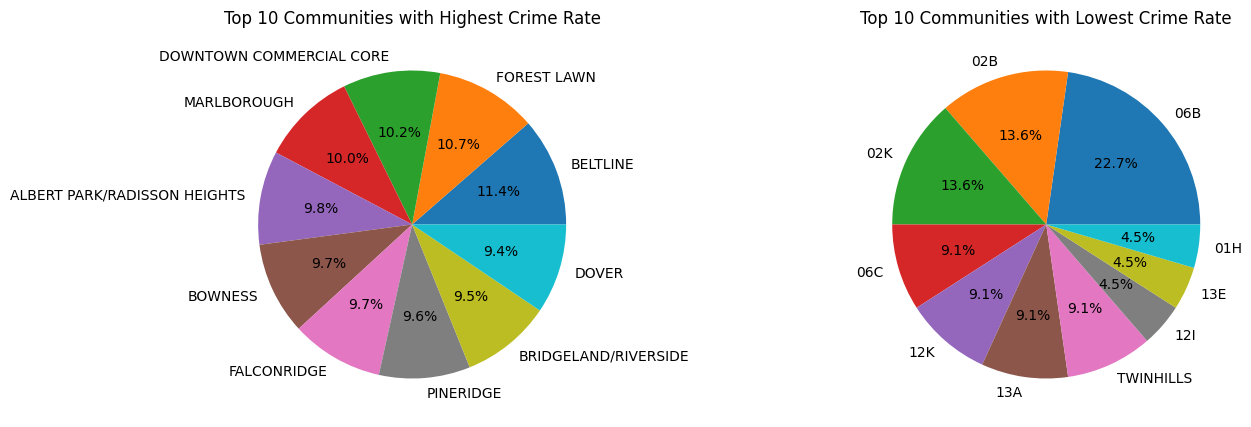

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Top 10 Communities with Highest Crime Rate
df['Community'].value_counts().head(10).plot.pie(autopct='%1.1f%%', ax = ax[0])
ax[0].set_title('Top 10 Communities with Highest Crime Rate')
ax[0].set_ylabel('')

# Top 10 Communities with Lowest Crime Rate
df['Community'].value_counts().tail(10).plot.pie(autopct='%1.1f%%', ax = ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime Rate')
ax[1].set_ylabel('')

These pie charts illustrate the distribution of crimes across Calgary communities. The first chart presents the top 10 most dangerous communities, while the second chart highlights the top 10 safest communities. In the first chart, Beltline has the highest share of crimes at 11.4%, followed by Forest Lawn (10.7%) and Downtown Commercial Core (10.2%). In the second chart, the safest community is 13M, representing 22.7% of the lowest crime counts, followed by 02K (13.6%) and 02B (13.6%).

**All observations are based solely on the data provided by the City of Calgary’s open data portal, without any bias.**

### Crime Category Distribution

Text(0, 0.5, '')

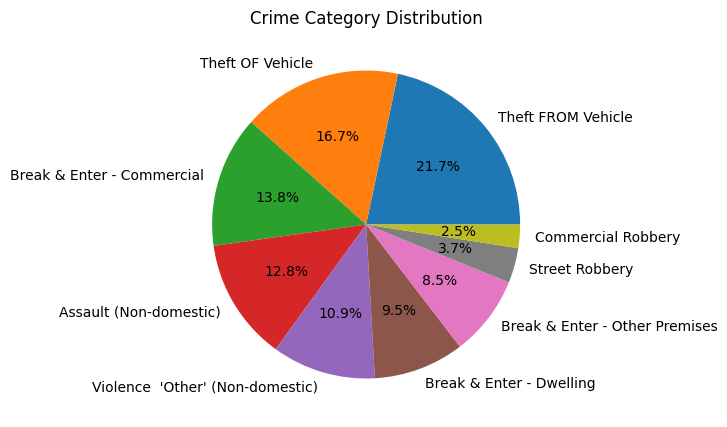

In [23]:
plt.figure(figsize=(5, 5))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Crime Category Distribution')
plt.ylabel('')

This graph illustrates the distribution of crimes by category based on the number of occurrences. The most common crime category is Theft from Vehicle, accounting for 21.7% of total crimes, followed by Theft of Vehicle (16.7%) and Break and Enter - Commercial (13.8%). The least frequent crime categories include Commercial or Street Robbery.

### Crime Reportings Over the Years

Text(0.5, 1.0, 'Crime Reportings by Year')

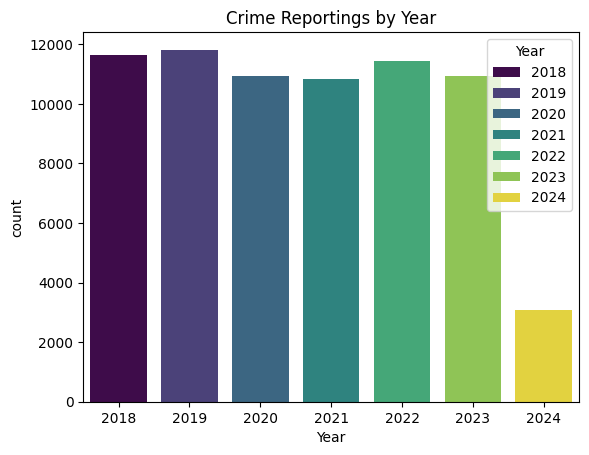

In [24]:
sns.countplot(x = 'Year', data = df, hue = 'Year', palette='viridis').set_title('Crime Reportings by Year')

This bar graph depicts the distribution of crimes reported each year. The year 2019 recorded the highest number of crimes, followed by 2022 and 2018. The lower number of reported crimes in 2024 reflects partial data available only up to April 2024.

### Crime Reportings by Month

Text(0.5, 1.0, 'Crime Reportings by Month')

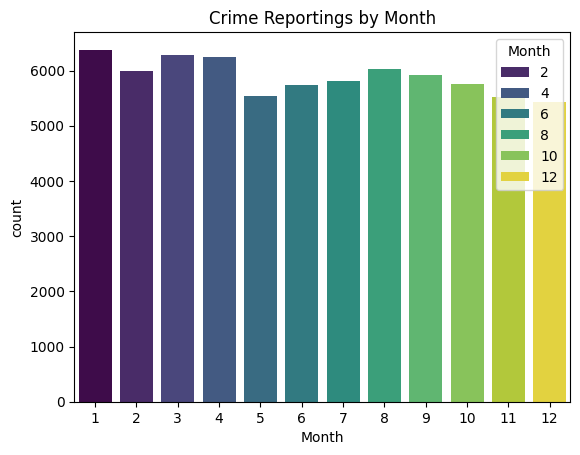

In [25]:
sns.countplot(x = 'Month', data = df, hue = 'Month', palette='viridis').set_title('Crime Reportings by Month')

### Community and Category Analysis

Text(0.5, 1.0, 'Top 5 Most safest Community and Crime Category')

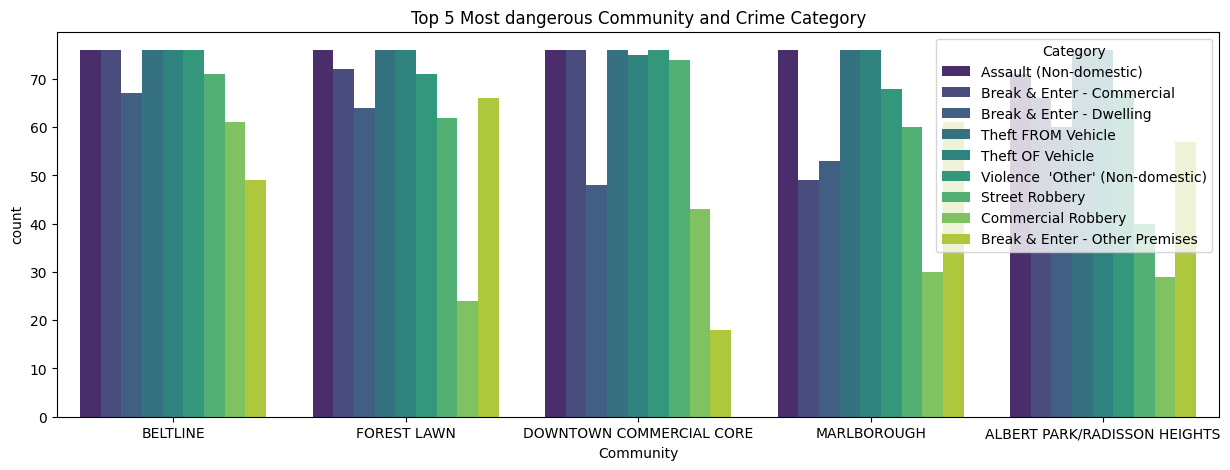

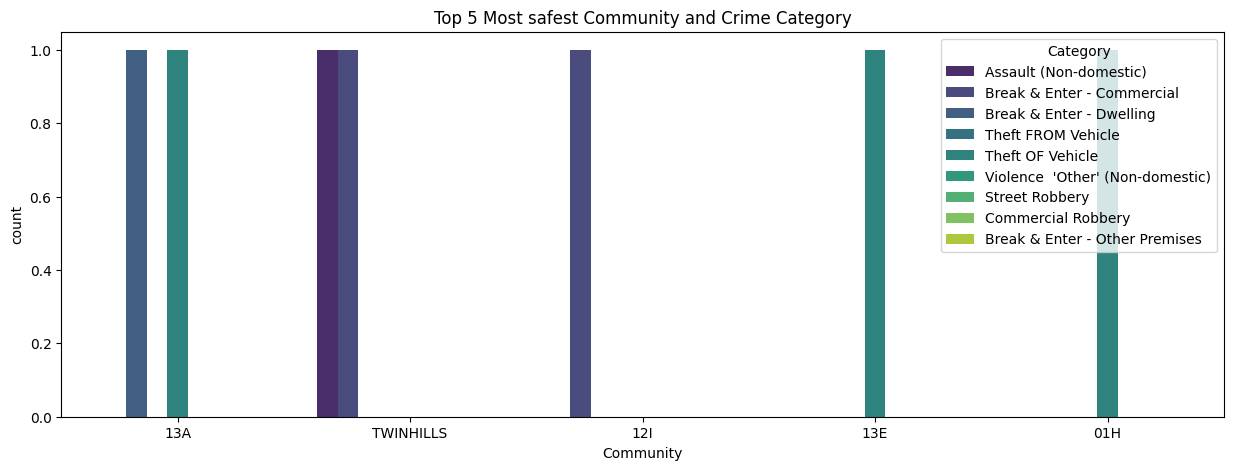

In [26]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().head(5).index).set_title('Top 5 Most dangerous Community and Crime Category')
sns.move_legend(plt.gca(), "upper right")
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().tail(5).index).set_title('Top 5 Most safest Community and Crime Category')

These two graphs illustrate the relationship between communities and crime categories, providing a clear visualization of crime patterns across Calgary. Certain crime categories occur more frequently in specific communities. For example, among the top 5 most dangerous communities, Forest Lawn has the highest number of Break & Enter - Other Premises incidents, while Marlborough records the lowest number of Commercial Robbery cases. These examples highlight patterns observed in the dataset.

### Year and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

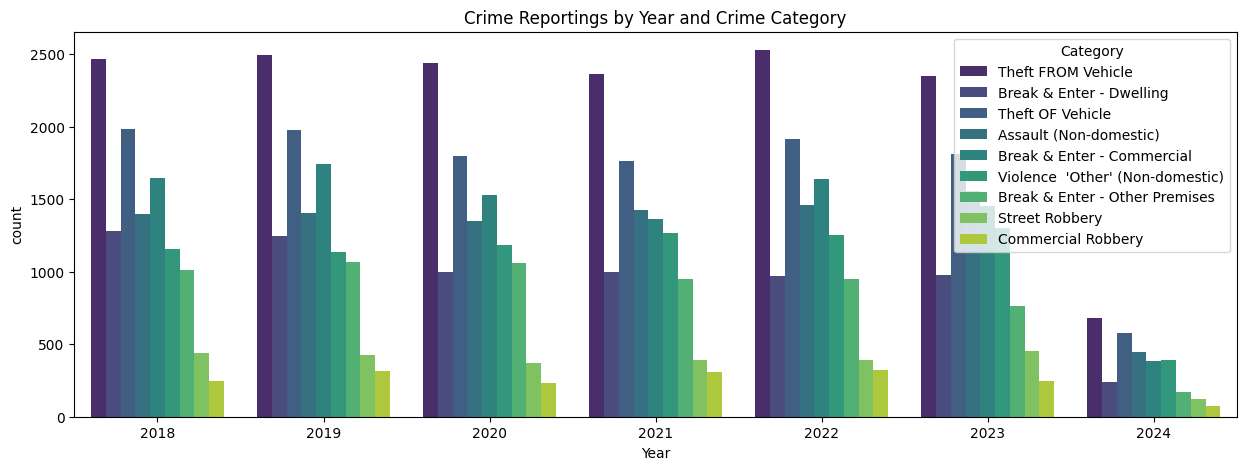

In [27]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')

### Month and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Month and Crime Category')

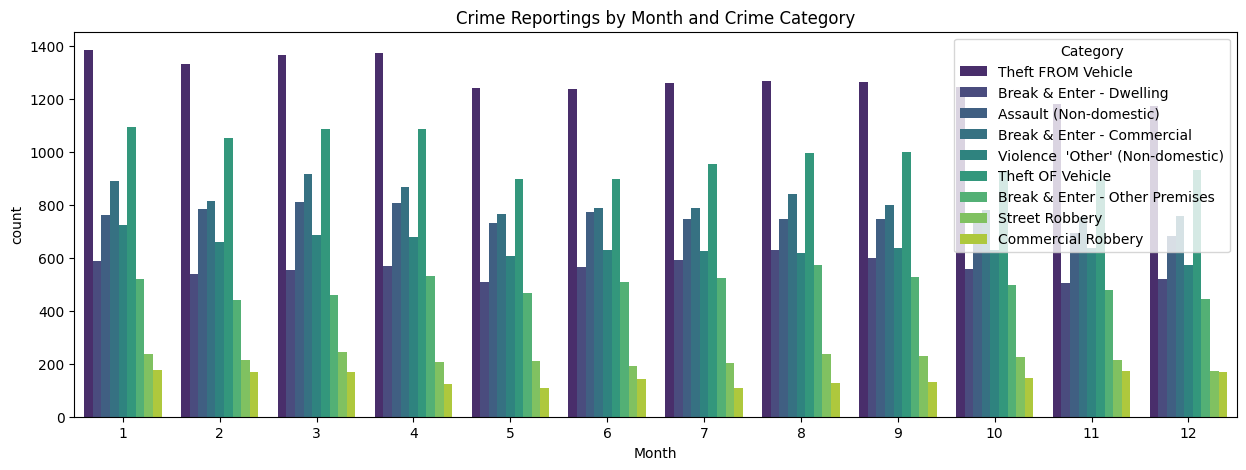

In [28]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Month', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Month and Crime Category')

From the above graphs, charts, and visualizations, the patterns, trends, and relationships in the data have been analyzed. These insights will support the development of a more accurate and effective predictive model.

## Data Preprocessing II

In [29]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding Object
le = LabelEncoder()

# Object type columns
object_type_columns = df.select_dtypes(include='object').columns

# Label Encoding
for col in object_type_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


## Building a Neural Network Model

In [30]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].to_numpy()
        y = data.iloc[i + seq_length]['Crime Count']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [31]:
seq_length = 3
X, y = create_sequences(df, seq_length)

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Building and Training the LSTM Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [34]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=16)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3092/3092 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 379.8354 - val_loss: 8.7384
Epoch 2/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 8.4473 - val_loss: 5.0836
Epoch 3/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 5.8556 - val_loss: 4.7899
Epoch 4/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 5.6136 - val_loss: 5.0016
Epoch 5/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 6.0135 - val_loss: 4.6633
Epoch 6/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 5.9148 - val_loss: 5.0528
Epoch 7/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 5.6883 - val_loss: 4.7725
Epoch 8/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 5.9919 - val_loss: 5.6660
Epoch 9/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 5.5211 - val_loss: 5.4064
Epoch 10/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 5.7773 - val_loss: 4.5977
Epoch 11/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 5.7326 - val_loss: 4.6956
Epoch 12/100
3092/

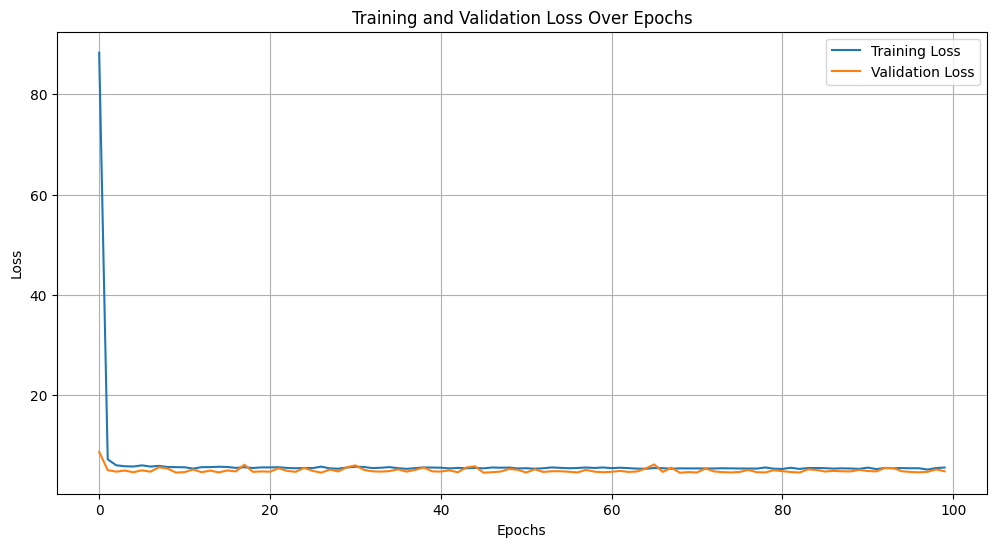

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Predictions
y_pred = model.predict(X_test)


print(f'Predictions: {y_pred.flatten()}')
print(f'True Values: {y_test.flatten()}')

332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5936
Test Loss: 4.675674915313721
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predictions: [3.7645302 2.242631  2.376038  ... 3.4916968 2.1917953 3.232455 ]
True Values: [2 1 1 ... 1 2 2]


## Model Evaluation
Actual vs Predicted Values

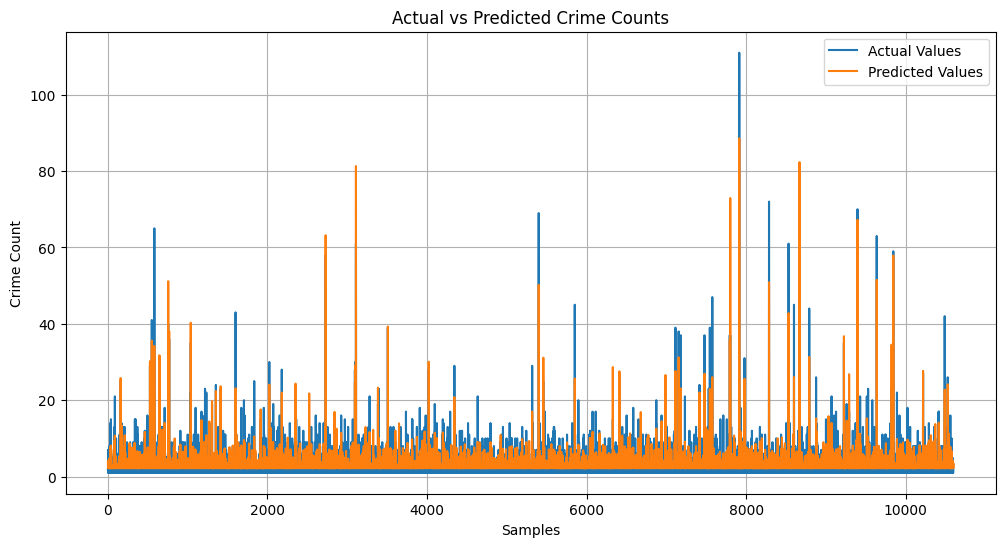

In [37]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

### Residual Plot

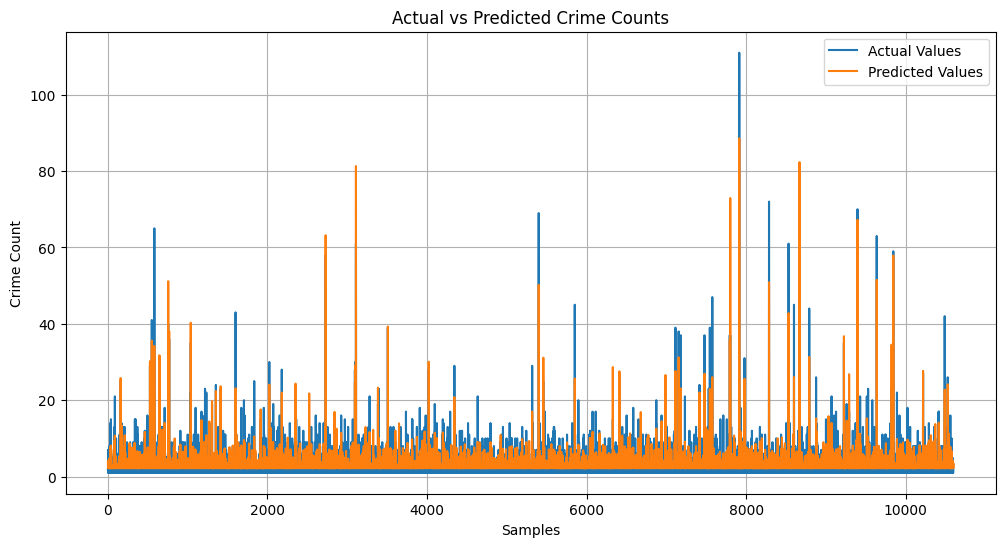

In [38]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()